In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "iris-flower-dataset"

This notebook was created for a High School Intro to Data Science and Statistics course taught by Zachary Fuller.

For this assignment, please follow the steps in the notebook. When you are finished, you may either make the notebook public and email me a link, or print out a pdf of the notebook after running your code.

Learning Outcomes (not including coding):
* Mean, Median, Mode, Quartiles
* Standard Deviation, IQR
* Box Plots for comparing Distributions

To start, we need to read the data into the notebook. There are several ways to do this. My personal favorite is to use fread() from library(data.table). It's my favorite because I can use it for almost anything, and it runs reasonably fast when working with large datasets. 
A popular option is read_csv() from readr.

In [2]:
#Copy the path to the iris-flower-dataset and read it into the notebook with the function of your choice.
#Don't forget to assign the dataset a name when you read it in.
library(data.table)
iris <- fread("/kaggle/input/iris-flower-dataset/IRIS.csv")

#Check the structure of the notebook using 2 different functions, head(), and str()
head(iris)
str(iris)

#next, use summary() to get some useful information about the dataset.
summary(iris)


Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




sepal_length,sepal_width,petal_length,petal_width,species
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa


Classes ‘data.table’ and 'data.frame':	150 obs. of  5 variables:
 $ sepal_length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ sepal_width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ petal_length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ petal_width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ species     : chr  "Iris-setosa" "Iris-setosa" "Iris-setosa" "Iris-setosa" ...
 - attr(*, ".internal.selfref")=<externalptr> 


  sepal_length    sepal_width     petal_length    petal_width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.054   Mean   :3.759   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
   species         
 Length:150        
 Class :character  
 Mode  :character  
                   
                   
                   

Edit this text to answer the following questions. Your answers should be based off of the output of the previous code.
What are types of data in each column?


How many rows of data are there?


What are the species of iris in this dataset?

Next up, I want you to compare the different species of iris. 
There are a lot of ways to do this, but today I want you to start by separating the data into 3 datasets.

In [3]:
#One way to approach this is to use the 'pipe operator' and filter from the tidyverse packages.
#I'll do the first one for you and want you to repeat this for the other species. 
#Note that my code assumes you named the dataset iris when you read it in. Adjust the code if needed.
setosa <- iris %>% 
filter(species == "Iris-setosa")
head(setosa) #I included head(setosa) just to make sure that everything loaded correctly. 

sepal_length,sepal_width,petal_length,petal_width,species
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
#If you want to you can also get specific values, using the following lines of code.
mean(setosa$sepal_length)
median(setosa$sepal_length)
sd(setosa$sepal_length)
quantile(setosa$sepal_length)

#quantile can be used to find other useful quantities using the probs argument, which is probs=c(0.25, 0.5, 0.75) be default.
#Try finding the middle 95% of the data as follows.
quantile(setosa$sepal_length, probs=c(0.025, 0.975))

#Now that we have the data divided into the 3 species, lets compare some summary statistics for the data.
#Here's how to get some summary statistics for setosa. Make sure to do the same for the other varieties.
summary(setosa)



[1] 5.006

[1] 5

[1] 0.3524897

0%  25%  50%  75% 100% 
 4.3  4.8  5.0  5.2  5.8

2.5% 97.5% 
  4.4   5.7

  sepal_length    sepal_width     petal_length    petal_width   
 Min.   :4.300   Min.   :2.300   Min.   :1.000   Min.   :0.100  
 1st Qu.:4.800   1st Qu.:3.125   1st Qu.:1.400   1st Qu.:0.200  
 Median :5.000   Median :3.400   Median :1.500   Median :0.200  
 Mean   :5.006   Mean   :3.418   Mean   :1.464   Mean   :0.244  
 3rd Qu.:5.200   3rd Qu.:3.675   3rd Qu.:1.575   3rd Qu.:0.300  
 Max.   :5.800   Max.   :4.400   Max.   :1.900   Max.   :0.600  
   species         
 Length:50         
 Class :character  
 Mode  :character  
                   
                   
                   

Answer the following questions.
Which variety has the largest median sepal length? Which has the 

Which variety has the largest median sepal width?

Which variety has the largest median petal length?

Which variety has the largest median petal width?

Which variety has the largest standard deviation for petal width?

Now, lets go ahead and make some boxplots to better compare the flower species. For now lets just focus in on Petal.Length.

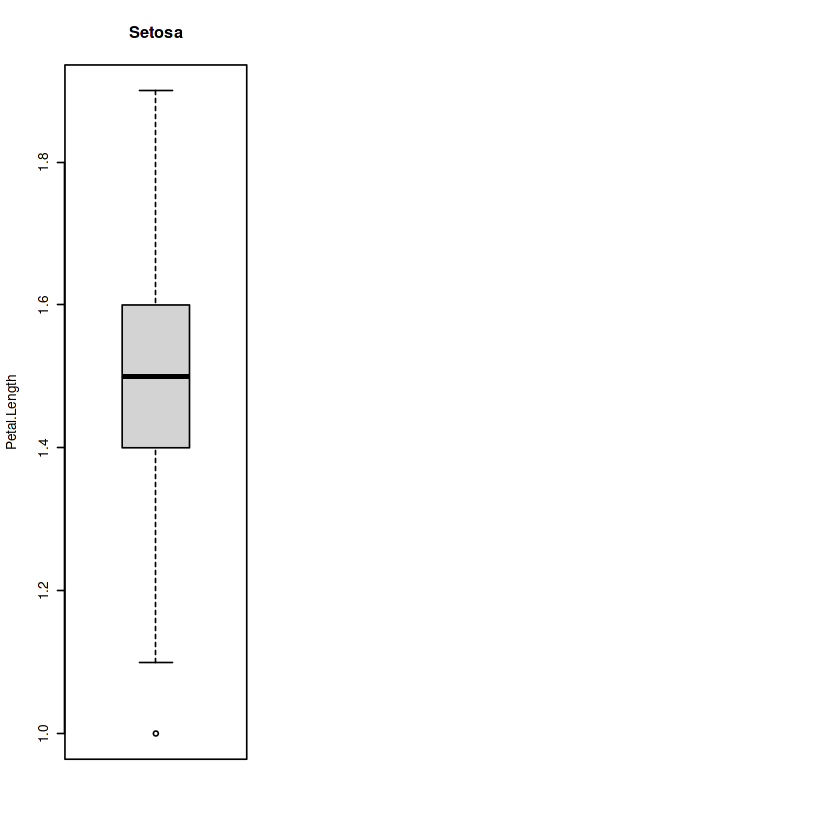

In [5]:
#Here are a couple of boxplots for setosa. Please do the same for the other varieties.
#First, I want all of the boxplots to show up together, so I'm going to use par(mfrow)
par(mfrow=c(1, 3))

boxplot(setosa$petal_length, main="Setosa", ylab="Petal.Length")

Edit this text box to add a comparison of the petal lengths of the 3 species, based on what you observe from the boxplots. Make sure to compare the median of each distribution, as well as the spread (IQR and Range).

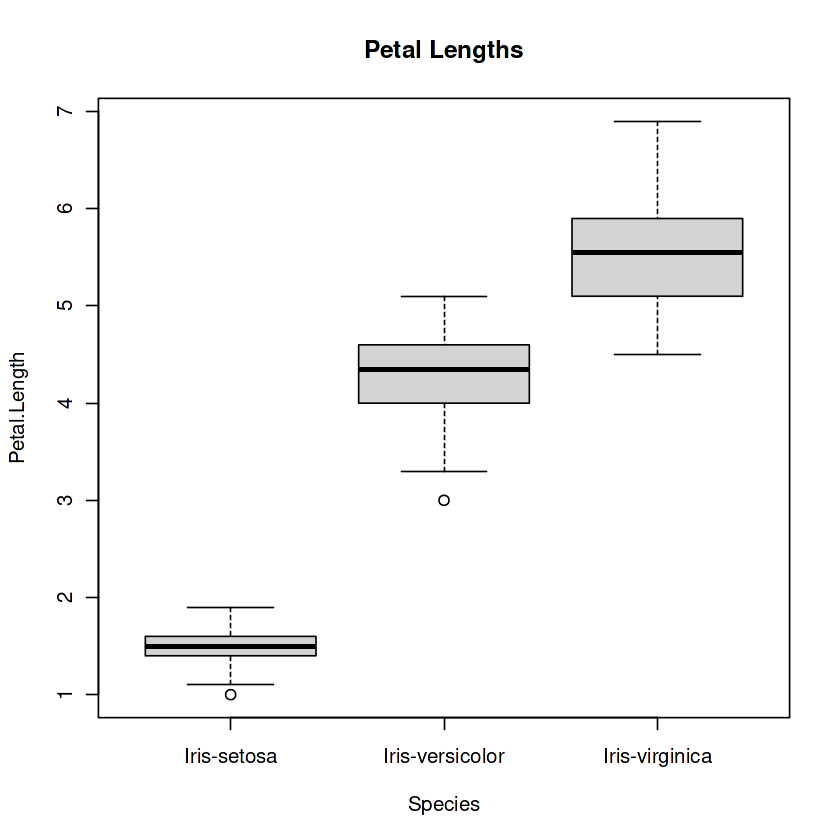

In [6]:
#It would be nice if we could just put all of the boxplots side by side. 
#Here's one way to do that using the original dataset
boxplot(iris$petal_length~iris$species, main="Petal Lengths", xlab="Species", ylab="Petal.Length")